In [5]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm


In [ ]:
brats_path = ("./brats2021/")
brats_new_path = ("./brats2021_npz/")
brats_list = os.listdir('./brats2021/')
levels = ['t1', 'flair', 't2', 't1ce']
for folder in tqdm(brats_list):
    data = np.ones((5, 240, 240, 155))
    for i, level in enumerate(levels):
        image = nib.load(brats_path+folder+'/'+folder+'_'+level+'.nii.gz').get_fdata()
        data[i, :, :, :] = image
    seg = nib.load(brats_path+folder+'/'+folder+'_'+'seg'+'.nii.gz').get_fdata()
    data[4, :, :, :] = seg
    new_file_path = brats_new_path + folder + ".npz"
    np.savez(new_file_path, data)
    


 16%|████▋                         | 197/1251 [06:02<58:56,  3.36s/it]

In [16]:
data.shape

(5, 240, 240, 155)

In [8]:
data

AttributeError: 'list' object has no attribute 'shape'

In [10]:
brats_list[0]

'BraTS2021_01394'

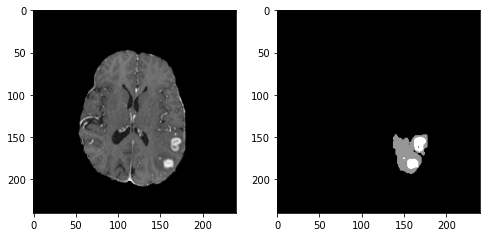

In [62]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
fig.add_subplot(1, 2, 2)
plt.imshow(seg_data[:, :, seg_data.shape[2] // 2].T, cmap='Greys_r')
plt.show()